In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [2]:
train_df = pd.read_json('train.json')
test_df = pd.read_json('test.json')

### Feature Engineering:

In [3]:
# dropping irrelevant features
train_df.drop(['bathrooms', 'bedrooms', 'street_address', 'display_address'], axis=1, inplace=True)
test_df.drop(['bathrooms', 'bedrooms', 'street_address', 'display_address'], axis=1, inplace=True)

In [4]:
# convert the created column to datetime object so as to extract more features 
train_df["created"] = pd.to_datetime(train_df["created"])
test_df["created"] = pd.to_datetime(test_df["created"])
train_df.head()

,building_id,created,description,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price
10,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000
10000,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465
100004,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...","[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850
100007,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275
100013,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350


In [5]:
test_df.head()

,building_id,created,description,features,latitude,listing_id,longitude,manager_id,photos,price
0,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950
1,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850
100,3dbbb69fd52e0d25131aa1cd459c87eb,2016-06-03 04:29:40,New York chic has reached a new level ...,"[Doorman, Elevator, No Fee]",40.7306,7103890,-73.9890,9ca6f3baa475c37a3b3521a394d65467,[https://photos.renthop.com/2/7103890_85b33077...,3758
1000,783d21d013a7e655bddc4ed0d461cc5e,2016-06-11 06:17:35,Step into this fantastic new Construction in t...,"[Roof Deck, Balcony, Elevator, Laundry in Buil...",40.7109,7143442,-73.9571,0b9d5db96db8472d7aeb67c67338c4d2,[https://photos.renthop.com/2/7143442_0879e9e0...,3300
100000,6134e7c4dd1a98d9aee36623c9872b49,2016-04-12 05:24:17,"~Take a stroll in Central Park, enjoy the ente...","[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.7650,6860601,-73.9845,b5eda0eb31b042ce2124fd9e9fcfce2f,[https://photos.renthop.com/2/6860601_c96164d8...,4900


In [6]:
# creating a created_hour feature
train_df["created_hour"] = train_df["created"].dt.hour
test_df["created_hour"] = test_df["created"].dt.hour

# and a created_day feature
train_df["created_day"] = train_df["created"].dt.day
test_df["created_day"] = test_df["created"].dt.day

In [7]:
# creating a column for the number of features of each house
train_df["num_features"] = train_df["features"].apply(len)
test_df["num_features"] = test_df["features"].apply(len)

In [8]:
# creating a column for the number of photos of each house
train_df["num_photos"] = train_df["photos"].apply(len)
test_df["num_photos"] = test_df["photos"].apply(len)

In [9]:
# count of words present in description column 
train_df["num_desc_words"] = train_df["description"].apply(lambda x: len(x.split(" ")))
test_df["num_desc_words"] = test_df["description"].apply(lambda x: len(x.split(" ")))

In [10]:
# deleting irrelevant features
train_df.drop(['photos', 'features', 'created', 'description'], axis=1, inplace=True)
test_df.drop(['photos', 'features', 'created', 'description'], axis=1, inplace=True)

In [11]:
# Let's split the data
y = train_df["interest_level"]
X = train_df.drop(['interest_level'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

#### Dealing with manager_id:

In [12]:
man_train_list = train_df['manager_id'].unique()
man_test_list = test_df['manager_id'].unique()
man_list = np.concatenate((man_train_list,man_test_list), axis=0)
man_list = list(set(man_list))

In [13]:
df100 = train_df[['manager_id','interest_level']]
interest_dummies = pd.get_dummies(df100['interest_level'])
df100 = pd.concat([df100,interest_dummies[['low','medium','high']]], axis = 1).drop('interest_level', axis = 1)
df100.head()

,manager_id,low,medium,high
10,5ba989232d0489da1b5f2c45f6688adc,0,1,0
10000,7533621a882f71e25173b27e3139d83d,1,0,0
100004,d9039c43983f6e564b1482b273bd7b01,0,0,1
100007,1067e078446a7897d2da493d2f741316,1,0,0
100013,98e13ad4b495b9613cef886d79a6291f,1,0,0


In [14]:
gby = pd.concat([df100.groupby('manager_id').mean(),df100.groupby('manager_id').count()], axis = 1).iloc[:,:-2]
gby.columns = ['man_low_frac','man_medium_frac','man_high_frac','man_count']

In [15]:
gby['manager_skill'] = gby['man_medium_frac']*1 + gby['man_high_frac']*2
gby.sort_values(by = 'man_count', ascending = False).head()

,man_low_frac,man_medium_frac,man_high_frac,man_count,manager_skill
manager_id,,,,,
e6472c7237327dd3903b3d6f6a94515a,0.686538,0.245559,0.067904,2533,0.381366
6e5c10246156ae5bdcd9b487ca99d96a,0.905767,0.088608,0.005626,711,0.099859
8f5a9c893f6d602f4953fcc0b8e6e9b4,0.987805,0.009756,0.002439,410,0.014634
62b685cc0d876c3a1a51d63a0d6a8082,1.000000,0.000000,0.000000,402,0.000000
cb87dadbca78fad02b388dc9e8f25a5b,0.361930,0.490617,0.147453,373,0.785523


In [16]:

mean_values = gby[['man_low_frac','man_medium_frac','man_high_frac','manager_skill']].mean()
mean_values

man_low_frac       0.722564
man_medium_frac    0.191016
man_high_frac      0.086419
manager_skill      0.363855
dtype: float64

In [17]:
# add the features computed on the training dataset to the train dataset
X_train = X_train.merge(gby.reset_index(),how='left', left_on='manager_id', right_on='manager_id')
X_train.head()

,building_id,latitude,listing_id,longitude,manager_id,price,created_hour,created_day,num_features,num_photos,num_desc_words,man_low_frac,man_medium_frac,man_high_frac,man_count,manager_skill
0,f8b3501d851b35f9320eaee361af812b,40.7505,7232461,-74.0025,9402236a97ffde27afb1d51bae23876a,2150,6,29,0,1,78,0.900000,0.100000,0.000000,20,0.100000
1,ddb8663b8c4a089684384035e53d9cb8,40.7446,6815025,-73.9740,85eb675b4027c82bcc27b473c5eac646,3295,3,2,3,4,101,0.684211,0.052632,0.263158,19,0.578947
2,146060fb99c371080bb8f0c8e9980b9b,40.6905,7149928,-73.9668,324631e1aacaa41bc4475f879756bbb6,2600,11,12,1,0,9,0.860759,0.101266,0.037975,79,0.177215
3,810ddef9046abe7bd8278944c5809ae8,40.7634,7150347,-73.9596,381040570cc863b743a9fce1a6ae9724,8995,11,12,1,4,68,0.893491,0.082840,0.023669,169,0.130178
4,20f10802809d24290e6bb32b4cffbc38,40.7933,6901729,-73.9675,5599e962719af3ccc2976855c2d5893c,5485,6,20,10,5,117,0.816406,0.171875,0.011719,256,0.195312


In [18]:
# add the features computed on the training dataset to the validation dataset obtained by train_test_split
X_test = X_test.merge(gby.reset_index(),how='left', left_on='manager_id', right_on='manager_id')
X_test.head()

,building_id,latitude,listing_id,longitude,manager_id,price,created_hour,created_day,num_features,num_photos,num_desc_words,man_low_frac,man_medium_frac,man_high_frac,man_count,manager_skill
0,80a120d6bc3aba97f40fee8c2204524b,40.7073,7098656,-74.0046,56d5b16222f138a23725efa0baee9889,4890,5,2,9,4,118,0.537313,0.238806,0.223881,67,0.686567
1,a17ed8505e3b10c5fc956fbc10b69de9,40.7972,7104824,-73.9486,06ba79af09fa392b303d82c65318e94a,2825,5,3,6,4,88,0.545455,0.350649,0.103896,77,0.558442
2,ea9045106c4e1fe52853b6af941f1c69,40.7612,7015830,-73.9978,3d3e99065b124ebbd0bc425aaa723647,3350,2,15,10,4,57,0.795918,0.163265,0.040816,49,0.244898
3,de1a334dba3858e8993a08dd551908de,40.7757,7042933,-73.9530,d9039c43983f6e564b1482b273bd7b01,2995,4,20,1,8,67,0.574627,0.365672,0.059701,134,0.485075
4,fd878eb37e6db35649f76dc21d85e17d,40.7298,7115310,-73.9871,7c5e4fc025b70c6540d6b0e06716b9dd,4700,2,6,5,13,72,0.423077,0.474359,0.102564,78,0.679487


In [19]:
# add the features computed on the training dataset to the test_df dataset
test_df = train_df.merge(gby.reset_index(),how='left', left_on='manager_id', right_on='manager_id')
new_manager_ixes = test_df['man_high_frac'].isnull()
test_df.loc[new_manager_ixes,['man_high_frac','man_low_frac', 'man_medium_frac','manager_skill']] = mean_values.values
test_df.head()

,building_id,interest_level,latitude,listing_id,longitude,manager_id,price,created_hour,created_day,num_features,num_photos,num_desc_words,man_low_frac,man_medium_frac,man_high_frac,man_count,manager_skill
0,53a5b119ba8f7b61d4e010512e0dfc85,medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,3000,7,24,0,5,95,0.744444,0.255556,0.000000,90,0.255556
1,c5c8a357cba207596b04d1afd1e4f130,low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,5465,12,12,5,11,9,0.988372,0.011628,0.000000,86,0.011628
2,c3ba40552e2120b0acfc3cb5730bb2aa,high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,2850,3,17,4,8,94,0.574627,0.365672,0.059701,134,0.485075
3,28d9ad350afeaab8027513a3e52ac8d5,low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,3275,2,18,2,3,80,0.806283,0.125654,0.068063,191,0.261780
4,0,low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,3350,1,28,1,3,68,1.000000,0.000000,0.000000,15,0.000000


#### Dealing with building_id in a similar way as manager_id:

In [20]:
bld_train_list = train_df.building_id.unique()
bld_test_list = test_df.building_id.unique()
bld_list = np.concatenate((bld_train_list,bld_test_list), axis=0)
bld_list = list(set(bld_list))

In [21]:

df100 = train_df[['building_id','interest_level']]
interest_dummies = pd.get_dummies(df100['interest_level'])
df100 = pd.concat([df100,interest_dummies[['low','medium','high']]], axis = 1).drop('interest_level', axis = 1)
df100.head()

,building_id,low,medium,high
10,53a5b119ba8f7b61d4e010512e0dfc85,0,1,0
10000,c5c8a357cba207596b04d1afd1e4f130,1,0,0
100004,c3ba40552e2120b0acfc3cb5730bb2aa,0,0,1
100007,28d9ad350afeaab8027513a3e52ac8d5,1,0,0
100013,0,1,0,0


In [22]:
gby = pd.concat([df100.groupby('building_id').mean(),df100.groupby('building_id').count()], axis = 1).iloc[:,:-2]
gby.columns = ['bd_low_frac','bd_medium_frac','bd_high_frac','bd_count']

In [23]:
gby['bd_avg_interest'] = gby['bd_medium_frac']*1 + gby['bd_high_frac']*2
gby.sort_values(by = 'bd_count', ascending = False).head()

,bd_low_frac,bd_medium_frac,bd_high_frac,bd_count,bd_avg_interest
building_id,,,,,
0,0.915762,0.060705,0.023534,8286,0.107772
96274288c84ddd7d5c5d8e425ee75027,0.650909,0.272727,0.076364,275,0.425455
11e1dec9d14b1a9e528386a2504b3afc,0.674419,0.241860,0.083721,215,0.409302
80a120d6bc3aba97f40fee8c2204524b,0.586854,0.328638,0.084507,213,0.497653
bb8658a3e432fb62a440615333376345,0.523585,0.353774,0.122642,212,0.599057


In [24]:
mean_values = gby[['bd_low_frac','bd_medium_frac','bd_high_frac','bd_avg_interest']].mean()
mean_values
# this is what I added

bd_low_frac        0.553652
bd_medium_frac     0.300489
bd_high_frac       0.145859
bd_avg_interest    0.592207
dtype: float64

In [25]:
# add the features computed on the training dataset to the training dataset
X_train = X_train.merge(gby.reset_index(),how='left', left_on='building_id', right_on='building_id')
X_train.head()

,building_id,latitude,listing_id,longitude,manager_id,price,created_hour,created_day,num_features,num_photos,...,man_low_frac,man_medium_frac,man_high_frac,man_count,manager_skill,bd_low_frac,bd_medium_frac,bd_high_frac,bd_count,bd_avg_interest
0,f8b3501d851b35f9320eaee361af812b,40.7505,7232461,-74.0025,9402236a97ffde27afb1d51bae23876a,2150,6,29,0,1,...,0.900000,0.100000,0.000000,20,0.100000,0.333333,0.500000,0.166667,6,0.833333
1,ddb8663b8c4a089684384035e53d9cb8,40.7446,6815025,-73.9740,85eb675b4027c82bcc27b473c5eac646,3295,3,2,3,4,...,0.684211,0.052632,0.263158,19,0.578947,0.690909,0.254545,0.054545,55,0.363636
2,146060fb99c371080bb8f0c8e9980b9b,40.6905,7149928,-73.9668,324631e1aacaa41bc4475f879756bbb6,2600,11,12,1,0,...,0.860759,0.101266,0.037975,79,0.177215,0.666667,0.111111,0.222222,9,0.555556
3,810ddef9046abe7bd8278944c5809ae8,40.7634,7150347,-73.9596,381040570cc863b743a9fce1a6ae9724,8995,11,12,1,4,...,0.893491,0.082840,0.023669,169,0.130178,0.923077,0.038462,0.038462,26,0.115385
4,20f10802809d24290e6bb32b4cffbc38,40.7933,6901729,-73.9675,5599e962719af3ccc2976855c2d5893c,5485,6,20,10,5,...,0.816406,0.171875,0.011719,256,0.195312,0.882353,0.117647,0.000000,17,0.117647


In [26]:
# add the features computed on the training dataset to the validation dataset obtained by train_test_split
X_test = X_test.merge(gby.reset_index(),how='left', left_on='building_id', right_on='building_id')
with pd.option_context('display.max_rows', 5, 'display.max_columns', 100):
    display(test_df)

,building_id,interest_level,latitude,listing_id,longitude,manager_id,price,created_hour,created_day,num_features,num_photos,num_desc_words,man_low_frac,man_medium_frac,man_high_frac,man_count,manager_skill
0,53a5b119ba8f7b61d4e010512e0dfc85,medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,3000,7,24,0,5,95,0.744444,0.255556,0.0,90,0.255556
1,c5c8a357cba207596b04d1afd1e4f130,low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,5465,12,12,5,11,9,0.988372,0.011628,0.0,86,0.011628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49350,ad67f6181a49bde19218929b401b31b7,low,40.7066,6841891,-74.0101,9fd3af5b2d23951e028059e8940a55d7,3350,2,8,5,9,99,1.000000,0.000000,0.0,2,0.000000
49351,5173052db6efc0caaa4d817112a70f32,low,40.8699,6858245,-73.9172,d7f57128272bfd82e33a61999b5f4c42,2200,2,12,1,7,133,0.937500,0.062500,0.0,16,0.062500


In [27]:
# add the features computed on the training dataset to the test_df dataset
test_df = test_df.merge(gby.reset_index(),how='left', left_on='building_id', right_on='building_id')
new_manager_ixes = test_df['bd_high_frac'].isnull()
test_df.loc[new_manager_ixes,['bd_high_frac','bd_low_frac', 'bd_medium_frac','bd_avg_interest']] = mean_values.values

with pd.option_context('display.max_rows', 5, 'display.max_columns', 100):
    display(test_df)

,building_id,interest_level,latitude,listing_id,longitude,manager_id,price,created_hour,created_day,num_features,num_photos,num_desc_words,man_low_frac,man_medium_frac,man_high_frac,man_count,manager_skill,bd_low_frac,bd_medium_frac,bd_high_frac,bd_count,bd_avg_interest
0,53a5b119ba8f7b61d4e010512e0dfc85,medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,3000,7,24,0,5,95,0.744444,0.255556,0.0,90,0.255556,0.666667,0.333333,0.000000,3,0.333333
1,c5c8a357cba207596b04d1afd1e4f130,low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,5465,12,12,5,11,9,0.988372,0.011628,0.0,86,0.011628,0.916667,0.083333,0.000000,24,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49350,ad67f6181a49bde19218929b401b31b7,low,40.7066,6841891,-74.0101,9fd3af5b2d23951e028059e8940a55d7,3350,2,8,5,9,99,1.000000,0.000000,0.0,2,0.000000,0.761905,0.222222,0.015873,63,0.253968
49351,5173052db6efc0caaa4d817112a70f32,low,40.8699,6858245,-73.9172,d7f57128272bfd82e33a61999b5f4c42,2200,2,12,1,7,133,0.937500,0.062500,0.0,16,0.062500,0.428571,0.428571,0.142857,7,0.714286


In [28]:
test_df.drop(['manager_id','man_count', 'bd_count', 'building_id', 'interest_level'], axis=1, inplace=True)
X_train.drop(['manager_id','man_count', 'bd_count', 'building_id'], axis=1, inplace=True)
X_test.drop(['manager_id','man_count', 'bd_count', 'building_id'], axis=1, inplace=True)
test_df.head()

,latitude,listing_id,longitude,price,created_hour,created_day,num_features,num_photos,num_desc_words,man_low_frac,man_medium_frac,man_high_frac,manager_skill,bd_low_frac,bd_medium_frac,bd_high_frac,bd_avg_interest
0,40.7145,7211212,-73.9425,3000,7,24,0,5,95,0.744444,0.255556,0.000000,0.255556,0.666667,0.333333,0.000000,0.333333
1,40.7947,7150865,-73.9667,5465,12,12,5,11,9,0.988372,0.011628,0.000000,0.011628,0.916667,0.083333,0.000000,0.083333
2,40.7388,6887163,-74.0018,2850,3,17,4,8,94,0.574627,0.365672,0.059701,0.485075,0.379310,0.448276,0.172414,0.793103
3,40.7539,6888711,-73.9677,3275,2,18,2,3,80,0.806283,0.125654,0.068063,0.261780,0.898990,0.090909,0.010101,0.111111
4,40.8241,6934781,-73.9493,3350,1,28,1,3,68,1.000000,0.000000,0.000000,0.000000,0.915762,0.060705,0.023534,0.107772


In [29]:
X_train.head()

,latitude,listing_id,longitude,price,created_hour,created_day,num_features,num_photos,num_desc_words,man_low_frac,man_medium_frac,man_high_frac,manager_skill,bd_low_frac,bd_medium_frac,bd_high_frac,bd_avg_interest
0,40.7505,7232461,-74.0025,2150,6,29,0,1,78,0.900000,0.100000,0.000000,0.100000,0.333333,0.500000,0.166667,0.833333
1,40.7446,6815025,-73.9740,3295,3,2,3,4,101,0.684211,0.052632,0.263158,0.578947,0.690909,0.254545,0.054545,0.363636
2,40.6905,7149928,-73.9668,2600,11,12,1,0,9,0.860759,0.101266,0.037975,0.177215,0.666667,0.111111,0.222222,0.555556
3,40.7634,7150347,-73.9596,8995,11,12,1,4,68,0.893491,0.082840,0.023669,0.130178,0.923077,0.038462,0.038462,0.115385
4,40.7933,6901729,-73.9675,5485,6,20,10,5,117,0.816406,0.171875,0.011719,0.195312,0.882353,0.117647,0.000000,0.117647


In [30]:
X_test.head()

,latitude,listing_id,longitude,price,created_hour,created_day,num_features,num_photos,num_desc_words,man_low_frac,man_medium_frac,man_high_frac,manager_skill,bd_low_frac,bd_medium_frac,bd_high_frac,bd_avg_interest
0,40.7073,7098656,-74.0046,4890,5,2,9,4,118,0.537313,0.238806,0.223881,0.686567,0.586854,0.328638,0.084507,0.497653
1,40.7972,7104824,-73.9486,2825,5,3,6,4,88,0.545455,0.350649,0.103896,0.558442,0.833333,0.083333,0.083333,0.250000
2,40.7612,7015830,-73.9978,3350,2,15,10,4,57,0.795918,0.163265,0.040816,0.244898,0.647482,0.309353,0.043165,0.395683
3,40.7757,7042933,-73.9530,2995,4,20,1,8,67,0.574627,0.365672,0.059701,0.485075,0.666667,0.333333,0.000000,0.333333
4,40.7298,7115310,-73.9871,4700,2,6,5,13,72,0.423077,0.474359,0.102564,0.679487,0.428571,0.428571,0.142857,0.714286


#### Dealing with listing_id:

In [31]:
#7250000
combine = [test_df, X_train, X_test]
for com in combine:
    com['listing_id'] = com['listing_id'].apply(lambda x: 1 if x < 7250000 else 0)

print("Test_df: \n" + str(test_df['listing_id'].value_counts()) + "\n \n")
print("X_train: \n" + str(X_train['listing_id'].value_counts()) + "\n \n")
print("X_test: \n" + str(X_test['listing_id'].value_counts()) + "\n \n")

Test_df: 
1    49095
0      257
Name: listing_id, dtype: int64
 

X_train: 
1    32898
0      167
Name: listing_id, dtype: int64
 

X_test: 
1    16197
0       90
Name: listing_id, dtype: int64
 



### Dealing with outliers:

#### First the price column:

In [32]:
cols = X_train.columns
cols

Index(['latitude', 'listing_id', 'longitude', 'price', 'created_hour',
       'created_day', 'num_features', 'num_photos', 'num_desc_words',
       'man_low_frac', 'man_medium_frac', 'man_high_frac', 'manager_skill',
       'bd_low_frac', 'bd_medium_frac', 'bd_high_frac', 'bd_avg_interest'],
      dtype='object')

In [33]:
cols = X_train.columns
data = [X_train, X_test, test_df]

for n,d in enumerate(data):
        for col in cols:
            ulimit = np.percentile(data[n][col].values, 99)
            data[n][col].loc[data[n][col]>ulimit] = ulimit

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


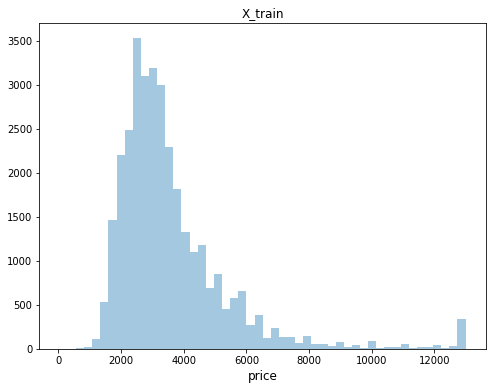

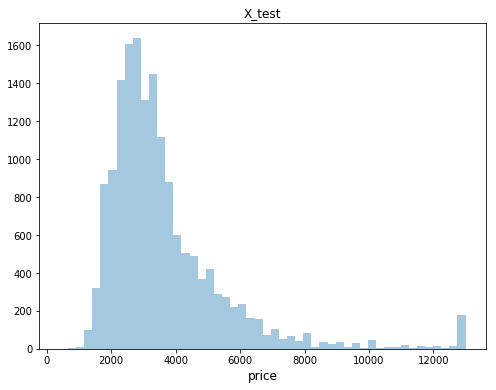

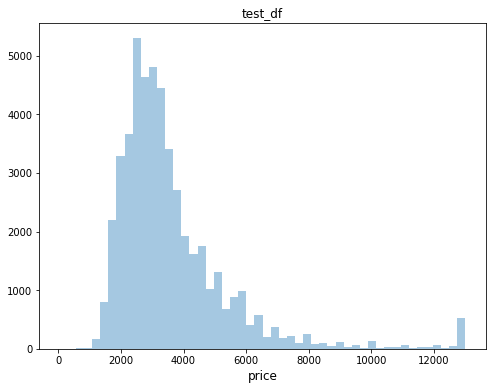

In [34]:
plt.figure(figsize=(8,6))
sns.distplot(X_train['price'].values, bins=50, kde=False)
plt.xlabel('price', fontsize=12)
plt.title('X_train')
plt.show()

plt.figure(figsize=(8,6))
sns.distplot(X_test['price'].values, bins=50, kde=False)
plt.xlabel('price', fontsize=12)
plt.title('X_test')
plt.show()

plt.figure(figsize=(8,6))
sns.distplot(test_df['price'].values, bins=50, kde=False)
plt.xlabel('price', fontsize=12)
plt.title('test_df')
plt.show()

#### Now latitude and longitude:

for d in data:
    llimit = np.percentile(d['latitude'].values, 1)
    ulimit = np.percentile(d['latitude'].values, 99)
    d['latitude'].loc[d['latitude']<llimit] = llimit
    d['latitude'].loc[d['latitude']>ulimit] = ulimit

for d in data:
    llimit = np.percentile(d['longitude'].values, 1)
    ulimit = np.percentile(d['longitude'].values, 99)
    d['longitude'].loc[d['longitude']<llimit] = llimit
    d['longitude'].loc[d['longitude']>ulimit] = ulimit

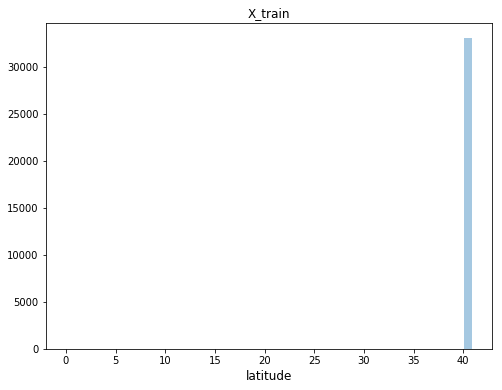

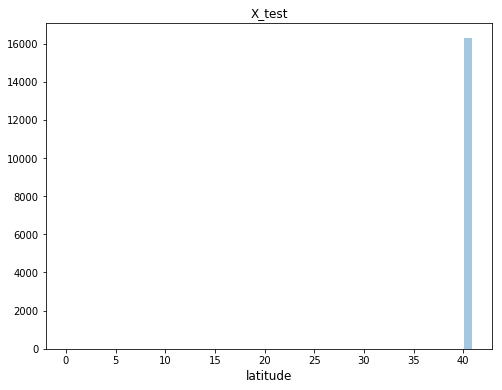

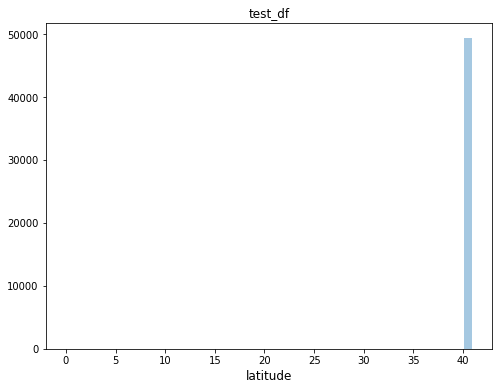

In [35]:
plt.figure(figsize=(8,6))
sns.distplot(X_train['latitude'].values, bins=50, kde=False)
plt.xlabel('latitude', fontsize=12)
plt.title('X_train')
plt.show()

plt.figure(figsize=(8,6))
sns.distplot(X_test['latitude'].values, bins=50, kde=False)
plt.xlabel('latitude', fontsize=12)
plt.title('X_test')
plt.show()

plt.figure(figsize=(8,6))
sns.distplot(test_df['latitude'].values, bins=50, kde=False)
plt.xlabel('latitude', fontsize=12)
plt.title('test_df')
plt.show() 

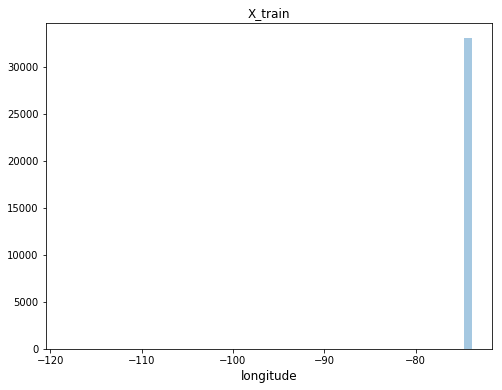

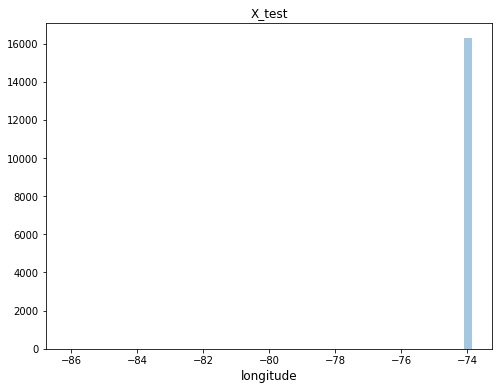

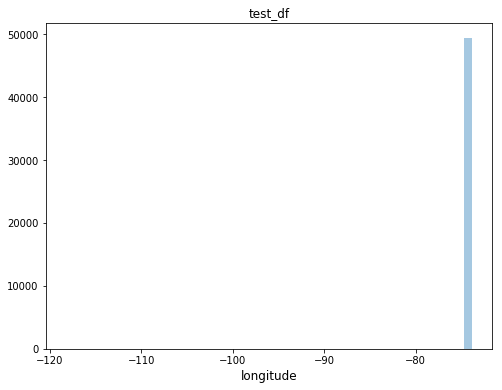

In [36]:
plt.figure(figsize=(8,6))
sns.distplot(X_train['longitude'].values, bins=50, kde=False)
plt.xlabel('longitude', fontsize=12)
plt.title('X_train')
plt.show()

plt.figure(figsize=(8,6))
sns.distplot(X_test['longitude'].values, bins=50, kde=False)
plt.xlabel('longitude', fontsize=12)
plt.title('X_test')
plt.show()

plt.figure(figsize=(8,6))
sns.distplot(test_df['longitude'].values, bins=50, kde=False)
plt.xlabel('longitude', fontsize=12)
plt.title('test_df')
plt.show() 

#### Now num_desc_words:

for d in data:
    ulimit = np.percentile(d['num_desc_words'].values, 99)
    d['num_desc_words'].loc[d['num_desc_words']>ulimit] = ulimit

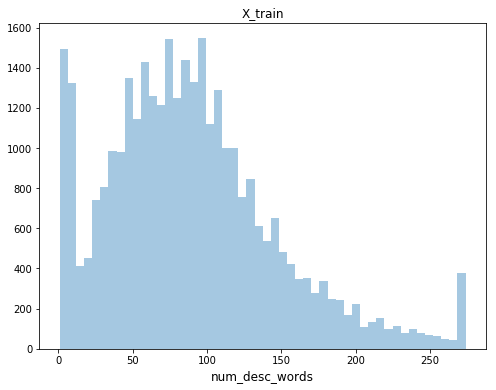

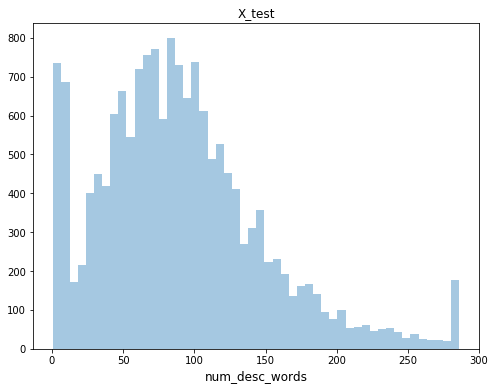

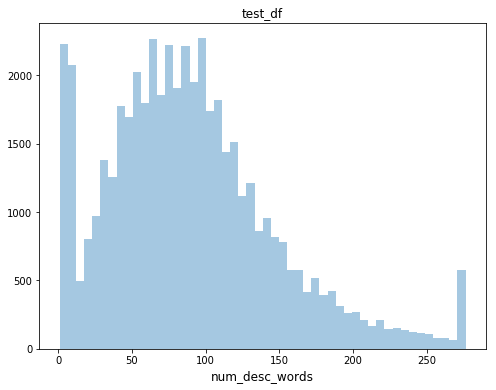

In [37]:
plt.figure(figsize=(8,6))
sns.distplot(X_train['num_desc_words'].values, bins=50, kde=False)
plt.xlabel('num_desc_words', fontsize=12)
plt.title('X_train')
plt.show()

plt.figure(figsize=(8,6))
sns.distplot(X_test['num_desc_words'].values, bins=50, kde=False)
plt.xlabel('num_desc_words', fontsize=12)
plt.title('X_test')
plt.show()

plt.figure(figsize=(8,6))
sns.distplot(test_df['num_desc_words'].values, bins=50, kde=False)
plt.xlabel('num_desc_words', fontsize=12)
plt.title('test_df')
plt.show() 

#### Scaling the features:

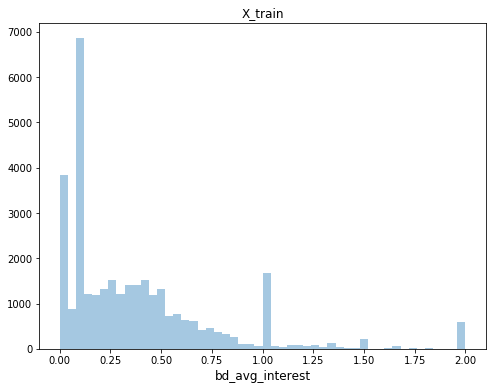

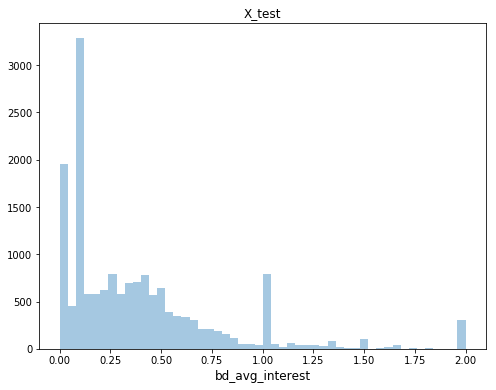

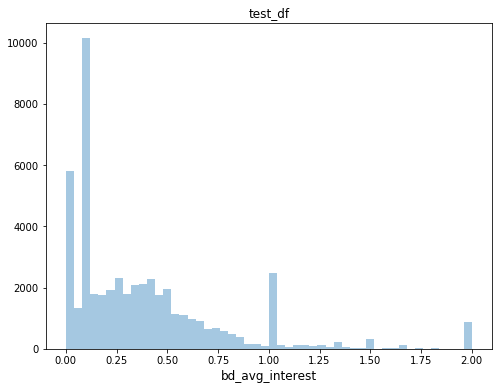

In [38]:
plt.figure(figsize=(8,6))
sns.distplot(X_train['bd_avg_interest'].values, bins=50, kde=False)
plt.xlabel('bd_avg_interest', fontsize=12)
plt.title('X_train')
plt.show()

plt.figure(figsize=(8,6))
sns.distplot(X_test['bd_avg_interest'].values, bins=50, kde=False)
plt.xlabel('bd_avg_interest', fontsize=12)
plt.title('X_test')
plt.show()

plt.figure(figsize=(8,6))
sns.distplot(test_df['bd_avg_interest'].values, bins=50, kde=False)
plt.xlabel('bd_avg_interest', fontsize=12)
plt.title('test_df')
plt.show() 

In [39]:
# I have made this change to with_outliers